In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_attention_pattern(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='Blues', vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel('Key Tokens')
    plt.ylabel('Query Tokens')
    plt.colorbar()
    plt.show()

def print_attention(attn_matrix, title):
    print(f"\n--- {title} ---")
    for i in range(seq_len):
        attended = [tokens[j] for j in range(seq_len) if attn_matrix[i, j] == 1]
        print(f'Token: "{tokens[i]}" ({i}) attends to: {attended}')

# Example sequence
tokens = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
seq_len = len(tokens)
seq_len

9

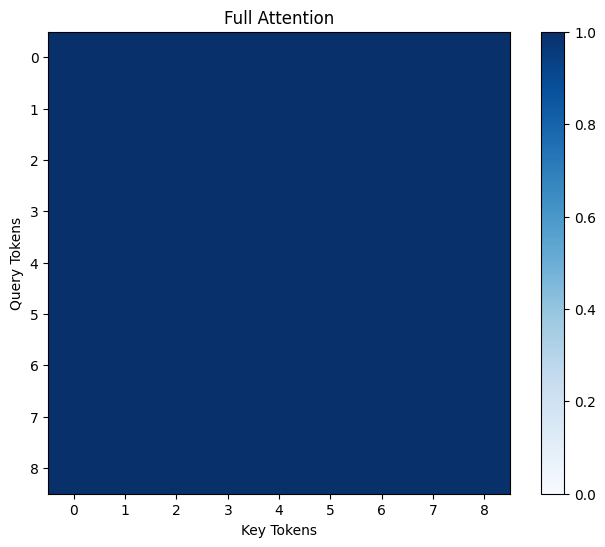


--- Full Attention ---
Token: "The" (0) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "quick" (1) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "brown" (2) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "fox" (3) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "jumps" (4) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "over" (5) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "the" (6) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "lazy" (7) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "dog" (8) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [2]:
# 1. Full Attention (Baseline)
full_attention = np.ones((seq_len, seq_len))
plot_attention_pattern(full_attention, "Full Attention")

print_attention(full_attention, "Full Attention")

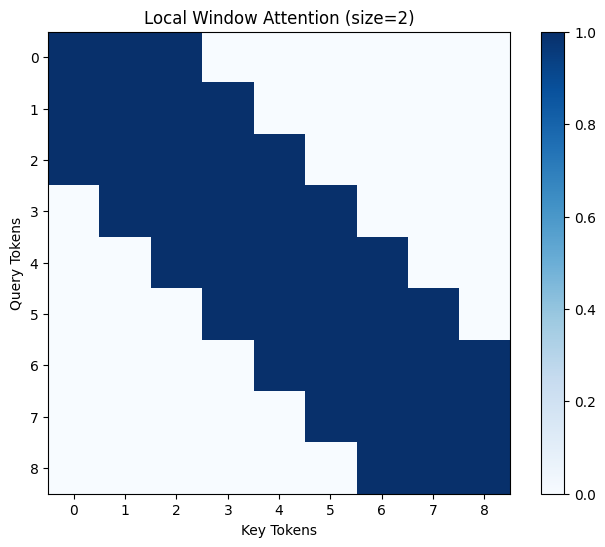


--- Local Window Attention (size=2) ---
Token: "The" (0) attends to: ['The', 'quick', 'brown']
Token: "quick" (1) attends to: ['The', 'quick', 'brown', 'fox']
Token: "brown" (2) attends to: ['The', 'quick', 'brown', 'fox', 'jumps']
Token: "fox" (3) attends to: ['quick', 'brown', 'fox', 'jumps', 'over']
Token: "jumps" (4) attends to: ['brown', 'fox', 'jumps', 'over', 'the']
Token: "over" (5) attends to: ['fox', 'jumps', 'over', 'the', 'lazy']
Token: "the" (6) attends to: ['jumps', 'over', 'the', 'lazy', 'dog']
Token: "lazy" (7) attends to: ['over', 'the', 'lazy', 'dog']
Token: "dog" (8) attends to: ['the', 'lazy', 'dog']


In [3]:
# 2. Local Window Attention
def local_window_attention(seq_len, window_size=2):
    attention = np.zeros((seq_len, seq_len))
    for i in range(seq_len):
        start = max(0, i - window_size)
        end = min(seq_len, i + window_size + 1)
        attention[i, start:end] = 1
    return attention

local_attn = local_window_attention(seq_len, window_size=2)
plot_attention_pattern(local_attn, "Local Window Attention (size=2)")

print_attention(local_attn, "Local Window Attention (size=2)")

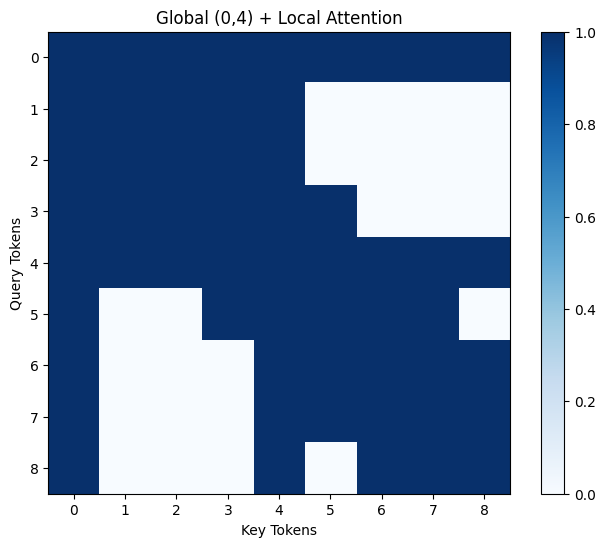


--- Global (0,4) + Local Attention ---
Token: "The" (0) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "quick" (1) attends to: ['The', 'quick', 'brown', 'fox', 'jumps']
Token: "brown" (2) attends to: ['The', 'quick', 'brown', 'fox', 'jumps']
Token: "fox" (3) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over']
Token: "jumps" (4) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "over" (5) attends to: ['The', 'fox', 'jumps', 'over', 'the', 'lazy']
Token: "the" (6) attends to: ['The', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "lazy" (7) attends to: ['The', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "dog" (8) attends to: ['The', 'jumps', 'the', 'lazy', 'dog']


In [4]:
# 3. Global Tokens + Local
def global_local_attention(seq_len, window_size=2, global_tokens=[0]):
    attention = np.zeros((seq_len, seq_len))

    # Local attention
    for i in range(seq_len):
        start = max(0, i - window_size)
        end = min(seq_len, i + window_size + 1)
        attention[i, start:end] = 1

    # Global attention rules
    for gt in global_tokens:
        # All tokens can attend to global tokens
        attention[:, gt] = 1
        # Global tokens can attend to all tokens
        attention[gt, :] = 1

    return attention

global_attn = global_local_attention(seq_len, global_tokens=[0, 4])
plot_attention_pattern(global_attn, "Global (0,4) + Local Attention")

print_attention(global_attn, "Global (0,4) + Local Attention")

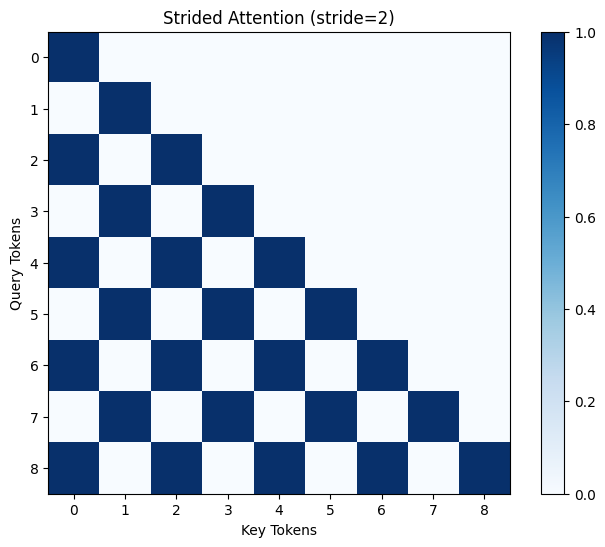


--- Strided Attention (stride=2) ---
Token: "The" (0) attends to: ['The']
Token: "quick" (1) attends to: ['quick']
Token: "brown" (2) attends to: ['The', 'brown']
Token: "fox" (3) attends to: ['quick', 'fox']
Token: "jumps" (4) attends to: ['The', 'brown', 'jumps']
Token: "over" (5) attends to: ['quick', 'fox', 'over']
Token: "the" (6) attends to: ['The', 'brown', 'jumps', 'the']
Token: "lazy" (7) attends to: ['quick', 'fox', 'over', 'lazy']
Token: "dog" (8) attends to: ['The', 'brown', 'jumps', 'the', 'dog']


In [5]:
# 4. Strided Attention
def strided_attention(seq_len, stride=2):
    attention = np.zeros((seq_len, seq_len))
    for i in range(seq_len):
        for j in range(i + 1):
            if j % stride == i % stride:
                attention[i, j] = 1
    return attention

strided_attn = strided_attention(seq_len, stride=2)
plot_attention_pattern(strided_attn, "Strided Attention (stride=2)")

print_attention(strided_attn, "Strided Attention (stride=2)")

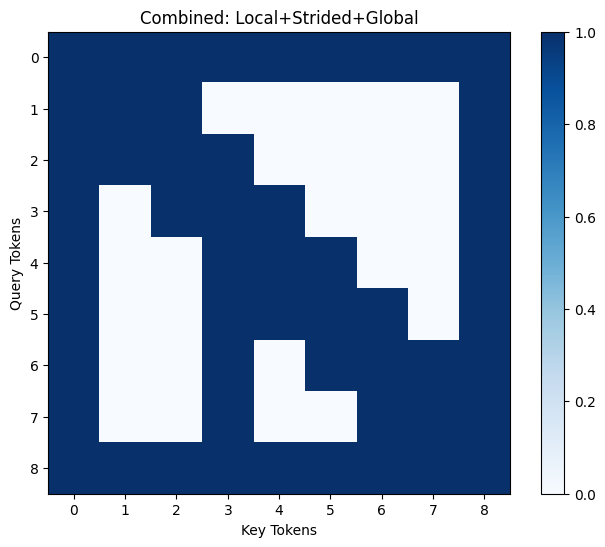


--- Combined: Local + Strided + Global Attention ---
Token: "The" (0) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Token: "quick" (1) attends to: ['The', 'quick', 'brown', 'dog']
Token: "brown" (2) attends to: ['The', 'quick', 'brown', 'fox', 'dog']
Token: "fox" (3) attends to: ['The', 'brown', 'fox', 'jumps', 'dog']
Token: "jumps" (4) attends to: ['The', 'fox', 'jumps', 'over', 'dog']
Token: "over" (5) attends to: ['The', 'fox', 'jumps', 'over', 'the', 'dog']
Token: "the" (6) attends to: ['The', 'fox', 'over', 'the', 'lazy', 'dog']
Token: "lazy" (7) attends to: ['The', 'fox', 'the', 'lazy', 'dog']
Token: "dog" (8) attends to: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [6]:
# 9. Combination: Local + Strided + Global
def combined_attention(seq_len, window_size=2, stride=3, global_tokens=[0]):
    attention = np.zeros((seq_len, seq_len))

    # Local attention
    for i in range(seq_len):
        start = max(0, i - window_size)
        end = min(seq_len, i + window_size + 1)
        attention[i, start:end] = 1

    # Strided attention
    for i in range(seq_len):
        for j in range(0, i+1, stride):
            attention[i, j] = 1

    # Global attention
    for gt in global_tokens:
        attention[:, gt] = 1
        attention[gt, :] = 1

    return attention

combined_attn = combined_attention(seq_len, window_size=1, stride=3, global_tokens=[0, -1])
plot_attention_pattern(combined_attn, "Combined: Local+Strided+Global")

print_attention(combined_attn, "Combined: Local + Strided + Global Attention")

In [8]:
import json

def clean_notebook_metadata(input_path, output_path=None):
    # Load the notebook
    with open(input_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    # Check and remove 'widgets' from 'metadata'
    if 'widgets' in notebook.get('metadata', {}):
        print("Removing 'widgets' metadata...")
        del notebook['metadata']['widgets']

    # Set output path
    if output_path is None:
        output_path = input_path  # Overwrite original file

    # Save the cleaned notebook
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(notebook, f, indent=2)

    print(f"Notebook cleaned and saved to: {output_path}")

# Example usage:
clean_notebook_metadata('/content/drive/MyDrive/sparse.ipynb', '/content/drive/MyDrive/sparse-examples.ipynb')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/sparse.ipynb'